In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('dataset/creditcard.csv')

In [4]:
print("Dataset shape:", df.shape)
print("\nColumn names:")
print(df.columns.tolist())
print("\nFirst few rows:")
print(df.head())

Dataset shape: (284807, 31)

Column names:
['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']

First few rows:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170  

Class distribution:
Class
0    284315
1       492
Name: count, dtype: int64

Percentage breakdown:
Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64


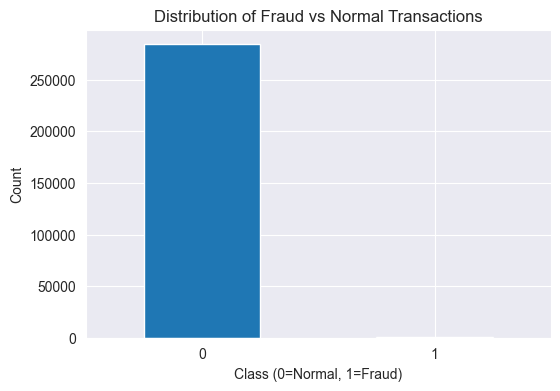

In [5]:
print("Class distribution:")
print(df['Class'].value_counts())
print("\nPercentage breakdown:")
print(df['Class'].value_counts(normalize=True) * 100)

# Visualize this imbalance
plt.figure(figsize=(6, 4))
df['Class'].value_counts().plot(kind='bar')
plt.title('Distribution of Fraud vs Normal Transactions')
plt.xlabel('Class (0=Normal, 1=Fraud)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

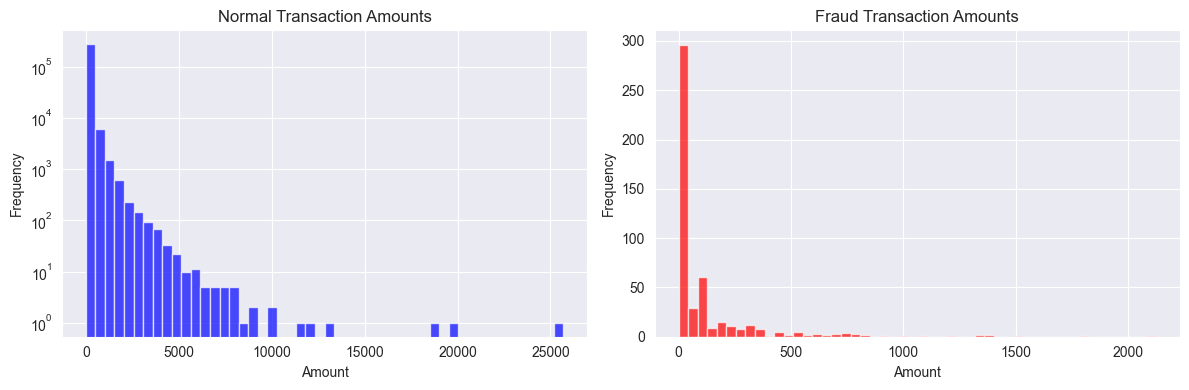

Normal transaction amounts:
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

Fraud transaction amounts:
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


In [6]:
# Compare transaction amounts between normal and fraud
plt.figure(figsize=(12, 4))

# Subplot 1: Amount distribution for normal transactions
plt.subplot(1, 2, 1)
normal_amounts = df[df['Class'] == 0]['Amount']
plt.hist(normal_amounts, bins=50, alpha=0.7, color='blue')
plt.title('Normal Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.yscale('log')  # Log scale due to large numbers

# Subplot 2: Amount distribution for fraud transactions
plt.subplot(1, 2, 2)
fraud_amounts = df[df['Class'] == 1]['Amount']
plt.hist(fraud_amounts, bins=50, alpha=0.7, color='red')
plt.title('Fraud Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Summary statistics - COMPLETED
print("Normal transaction amounts:")
print(normal_amounts.describe())
print("\nFraud transaction amounts:")
print(fraud_amounts.describe())

In [7]:
print("Data Preprocessing")
print("Dataset shape:", df.shape)
print("Missing values per column:")
print(df.isnull().sum().sum())  # Total missing values

# Check data types
print("\nData types:")
print(df.dtypes.value_counts())

# Check for any infinite values
print("\nChecking for infinite values:")
print("Any infinite values?", np.isinf(df.select_dtypes(include=[np.number])).any().any())


print("\n Feature Preparation")

# Separate features (X) and target (y)
# X = all columns except 'Class'
# y = 'Class' column (0 = Normal, 1 = Fraud)
X = df.drop('Class', axis=1)  # Features
y = df['Class']               # Target

print("Features shape:", X.shape)
print("Target shape:", y.shape)
print("Feature columns:", X.columns.tolist())

from sklearn.model_selection import train_test_split

print("\n=== SPLITTING DATA ===")

# Split data: 80% training, 20% testing
# stratify=y ensures both sets have same fraud ratio
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,     # 20% for testing
    random_state=42,   # For reproducible results
    stratify=y         # Keep same fraud ratio in both sets
)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)
print("\nTraining set class distribution:")
print(y_train.value_counts(normalize=True) * 100)
print("\nTest set class distribution:")
print(y_test.value_counts(normalize=True) * 100)

Data Preprocessing
Dataset shape: (284807, 31)
Missing values per column:
0

Data types:
float64    30
int64       1
Name: count, dtype: int64

Checking for infinite values:
Any infinite values? False

 Feature Preparation
Features shape: (284807, 30)
Target shape: (284807,)
Feature columns: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

=== SPLITTING DATA ===
Training set shape: (227845, 30)
Test set shape: (56962, 30)

Training set class distribution:
Class
0    99.827075
1     0.172925
Name: proportion, dtype: float64

Test set class distribution:
Class
0    99.827955
1     0.172045
Name: proportion, dtype: float64


In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

print(" MODEL TRAINING PHASE")
print("Step 1: Scaling features...")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(" Features scaled")
print("Example: Before scaling, Amount ranged", X_train['Amount'].min(), "to", X_train['Amount'].max())
print("After scaling, Amount column mean ≈", X_train_scaled[:, -1].mean().round(3), "std ≈", X_train_scaled[:, -1].std().round(3))

print("\nStep 2: Training Random Forest model...")

# Why Random Forest?
# - Handles imbalanced data well
# - Robust to outliers
# - Provides feature importance
# - Good baseline model
rf_model = RandomForestClassifier(
    n_estimators=100,    # Number of trees
    random_state=42,     # Reproducible results
    class_weight='balanced',  # Handle imbalanced data
    n_jobs=-1           # Use all CPU cores
)

# Train the model
rf_model.fit(X_train_scaled, y_train)
print("✓ Model trained successfully!")

# =====================================
# INITIAL PREDICTIONS
# =====================================
print("\nStep 3: Making predictions...")

y_pred = rf_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

print(f"✓ Predictions complete!")
print(f"Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")

# Quick fraud detection check
fraud_detected = (y_pred == 1).sum()
actual_fraud = (y_test == 1).sum()
print(f"Fraud cases detected: {fraud_detected}")
print(f"Actual fraud cases: {actual_fraud}")
print(f"Detection rate: {fraud_detected/actual_fraud*100:.2f}%" if actual_fraud > 0 else "No fraud in test set")

=== MODEL TRAINING PHASE ===
Step 1: Scaling features...
✓ Features scaled
Example: Before scaling, Amount ranged 0.0 to 25691.16
After scaling, Amount column mean ≈ 0.0 std ≈ 1.0

Step 2: Training Random Forest model...
✓ Model trained successfully!

Step 3: Making predictions...
✓ Predictions complete!
Accuracy: 0.9995 (99.95%)
Fraud cases detected: 76
Actual fraud cases: 98
Detection rate: 77.55%


In [9]:
print("Model performance evaluation")


print("1. CONFUSION MATRIX")
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print("                 Predicted")
print("                Normal  Fraud")
print(f"Actual Normal   {cm[0,0]:6d}  {cm[0,1]:5d}")
print(f"Actual Fraud    {cm[1,0]:6d}  {cm[1,1]:5d}")


print("\n2. KEY FRAUD DETECTION METRICS")

# True Positives (TP): Correctly identified fraud
# False Positives (FP): Normal transactions flagged as fraud  
# False Negatives (FN): Missed fraud cases
# True Negatives (TN): Correctly identified normal

TP = cm[1,1]  # Fraud correctly identified as fraud
FP = cm[0,1]  # Normal incorrectly identified as fraud
FN = cm[1,0]  # Fraud incorrectly identified as normal
TN = cm[0,0]  # Normal correctly identified as normal

precision = TP / (TP + FP) if (TP + FP) > 0 else 0
recall = TP / (TP + FN) if (TP + FN) > 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print(f"Precision: {precision:.4f} ({precision*100:.2f}%)")
print(f"Recall:    {recall:.4f} ({recall*100:.2f}%)")
print(f"F1-Score:  {f1_score:.4f}")

print("\n3. BUSINESS IMPACT")
print(f"• Fraud cases caught: {TP} out of {TP + FN}")
print(f"• Fraud cases missed: {FN}")
print(f"• False alarms: {FP} (normal transactions flagged)")
print(f"• Cost of missed fraud: High (each missed case is real money lost)")
print(f"• Cost of false alarms: Medium (customer inconvenience)")


print("\n4. DETAILED CLASSIFICATION REPORT")
print(classification_report(y_test, y_pred, 
                          target_names=['Normal', 'Fraud'],
                          digits=4))

=== DETAILED MODEL EVALUATION ===
1. CONFUSION MATRIX
Confusion Matrix:
                 Predicted
                Normal  Fraud
Actual Normal    56861      3
Actual Fraud        25     73

2. KEY FRAUD DETECTION METRICS
Precision: 0.9605 (96.05%)
Recall:    0.7449 (74.49%)
F1-Score:  0.8391

3. BUSINESS IMPACT
• Fraud cases caught: 73 out of 98
• Fraud cases missed: 25
• False alarms: 3 (normal transactions flagged)
• Cost of missed fraud: High (each missed case is real money lost)
• Cost of false alarms: Medium (customer inconvenience)

4. DETAILED CLASSIFICATION REPORT
              precision    recall  f1-score   support

      Normal     0.9996    0.9999    0.9998     56864
       Fraud     0.9605    0.7449    0.8391        98

    accuracy                         0.9995     56962
   macro avg     0.9800    0.8724    0.9194     56962
weighted avg     0.9995    0.9995    0.9995     56962



=== UNDERSTANDING WHAT THE MODEL LEARNED ===
Top 10 Most Important Features:
   feature  importance
14     V14    0.179738
10     V10    0.115455
12     V12    0.096318
4       V4    0.095611
17     V17    0.095131
3       V3    0.068694
11     V11    0.056131
16     V16    0.040341
2       V2    0.036234
9       V9    0.026945


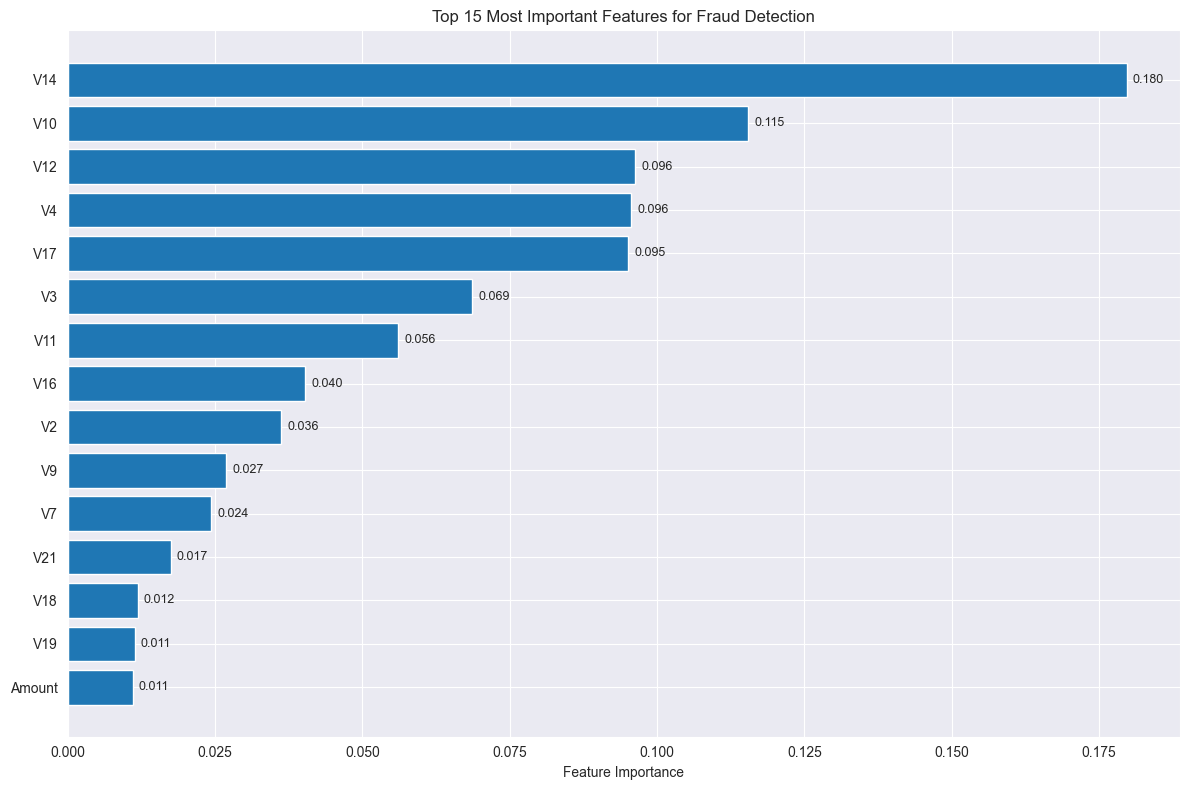


• The model relies most heavily on: V14
• Total features used: 30
• Top 5 features contribute: 58.23% of decision


In [10]:
# Get feature importance from Random Forest
feature_importance = rf_model.feature_importances_
feature_names = X.columns

importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importance
}).sort_values('importance', ascending=False)

print("Top 10 Most Important Features:")
print(importance_df.head(10))

plt.figure(figsize=(12, 8))

# Plot top 15 features
top_features = importance_df.head(15)
plt.barh(range(len(top_features)), top_features['importance'])
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Feature Importance')
plt.title('Top 15 Most Important Features for Fraud Detection')
plt.gca().invert_yaxis()  # Show most important at top


for i, importance in enumerate(top_features['importance']):
    plt.text(importance + 0.001, i, f'{importance:.3f}', 
             va='center', fontsize=9)

plt.tight_layout()
plt.show()

print(f"\n• The model relies most heavily on: {importance_df.iloc[0]['feature']}")
print(f"• Total features used: {len(feature_names)}")
print(f"• Top 5 features contribute: {importance_df.head(5)['importance'].sum():.2%} of decision")

In [11]:
import joblib
import json
from datetime import datetime



print("1. Saving trained model and scaler...")


joblib.dump(rf_model, 'fraud_detection_model.pkl')
joblib.dump(scaler, 'feature_scaler.pkl')

print("✓ Model saved as 'fraud_detection_model.pkl'")
print("✓ Scaler saved as 'feature_scaler.pkl'")


print("\n2. Creating model metadata...")

model_info = {
    "model_type": "RandomForestClassifier",
    "training_date": datetime.now().isoformat(),
    "dataset_size": len(df),
    "features_count": len(X.columns),
    "test_accuracy": float(accuracy),
    "test_precision": float(precision),
    "test_recall": float(recall),
    "test_f1_score": float(f1_score),
    "feature_names": X.columns.tolist(),
    "top_5_features": importance_df.head(5)['feature'].tolist(),
    "class_distribution": {
        "normal": int((y == 0).sum()),
        "fraud": int((y == 1).sum())
    }
}

# Save metadata
with open('model_metadata.json', 'w') as f:
    json.dump(model_info, f, indent=2)

print("Model metadata saved as 'model_metadata.json'")


sample_index = 100  # Random sample
sample_features = X_test.iloc[sample_index:sample_index+1]
sample_scaled = scaler.transform(sample_features)
sample_prediction = rf_model.predict(sample_scaled)[0]
sample_probability = rf_model.predict_proba(sample_scaled)[0]

actual_label = y_test.iloc[sample_index]

print("Sample Transaction:")
print(f"• Features: Amount={sample_features['Amount'].iloc[0]:.2f}, Time={sample_features['Time'].iloc[0]:.1f}")
print(f"• Actual: {'FRAUD' if actual_label == 1 else 'NORMAL'}")
print(f"• Predicted: {'FRAUD' if sample_prediction == 1 else 'NORMAL'}")
print(f"• Confidence: Normal={sample_probability[0]:.3f}, Fraud={sample_probability[1]:.3f}")
print(f"• Fraud Risk Score: {sample_probability[1]*100:.1f}%")

=== PREPARING MODEL FOR DEPLOYMENT ===
1. Saving trained model and scaler...
✓ Model saved as 'fraud_detection_model.pkl'
✓ Scaler saved as 'feature_scaler.pkl'

2. Creating model metadata...
✓ Model metadata saved as 'model_metadata.json'

3. Testing single prediction (API simulation)...
Sample Transaction:
• Features: Amount=124.00, Time=144113.0
• Actual: NORMAL
• Predicted: NORMAL
• Confidence: Normal=1.000, Fraud=0.000
• Fraud Risk Score: 0.0%

✓ Model ready for API deployment!

Next: Create FastAPI endpoint to serve this model
